### Importamos las librerias

In [0]:
from pyspark.sql import SparkSession
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.classification import LogisticRegression
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
from pyspark.ml.evaluation import BinaryClassificationEvaluator
from pyspark.sql.functions import when,col,rand


### Cargamos los datos de las estadisticas de los equipos por partido

In [0]:
# Cargar el dataset desde el archivo CSV
file_path = "/FileStore/shared_uploads/mauri07rodriguezcordoba@gmail.com/Equipos_Match_Fusion_Results_FINAL.csv"
df = spark.read.csv(file_path, header=True, inferSchema=True)

# Mostrar los primeros registros para verificar la carga correcta
display(df)

game_id,team_id,team_name,team_rating,date,won_corners,won_contest,total_tackle,aerial_lost,possession_percentage,accurate_pass,total_pass,shot_off_target,total_offside,blocked_scoring_att,ontarget_scoring_att,aerial_won,goals,att_pen_goal,post_scoring_att,Salvadas Portero,Total Shots,Foults,Yellow Cards,Red Cards,Resultado
1190174,13,Arsenal FC,7.30714285714286,2017-08-11,9,16,23,18,70.0,538,632,9,5,8,10,18,4,0,0,6,27,9,0,0,Ganó
1190175,211,Brighton & Hove Albion,6.30857142857143,2017-08-12,3,7,10,13,21.8,130,213,2,6,2,2,13,0,0,0,2,6,6,0,0,Perdió
1190176,15,Chelsea FC,6.39642857142857,2017-08-12,8,5,10,22,61.9,446,521,6,2,7,6,17,2,0,0,4,19,16,3,2,Perdió
1190177,162,Crystal Palace FC,6.53615384615385,2017-08-12,12,18,24,16,56.7,304,391,7,0,3,4,18,0,0,0,4,14,7,1,0,Perdió
1190178,31,Everton FC,6.99357142857143,2017-08-12,6,1,17,25,61.6,392,497,3,2,2,4,19,1,0,0,3,9,13,1,0,Ganó
1190181,18,Southampton FC,6.83357142857143,2017-08-12,13,6,12,18,59.6,432,518,16,0,11,2,17,0,0,1,2,29,10,2,0,Empate
1190182,27,Watford FC,6.69142857142857,2017-08-12,3,11,19,25,45.6,277,395,4,3,1,4,22,3,0,0,1,9,14,0,0,Empate
1190183,175,West Bromwich Albion FC,7.02857142857143,2017-08-12,8,1,19,18,28.7,157,242,9,2,1,6,12,1,0,0,5,16,15,3,0,Ganó
1190179,32,Manchester United FC,7.67785714285714,2017-08-13,11,23,14,13,55.4,417,493,8,1,8,5,23,4,0,1,1,22,19,2,0,Ganó
1190180,23,Newcastle United FC,6.28142857142857,2017-08-13,5,4,12,15,26.9,157,245,4,2,0,2,16,0,0,0,2,6,6,1,1,Perdió


In [0]:
df.columns

Out[42]: ['game_id',
 'team_id',
 'team_name',
 'team_rating',
 'date',
 'won_corners',
 'won_contest',
 'total_tackle',
 'aerial_lost',
 'possession_percentage',
 'accurate_pass',
 'total_pass',
 'shot_off_target',
 'total_offside',
 'blocked_scoring_att',
 'ontarget_scoring_att',
 'aerial_won',
 'goals',
 'att_pen_goal',
 'post_scoring_att',
 'Salvadas Portero',
 'Total Shots',
 'Foults',
 'Yellow Cards',
 'Red Cards',
 'Resultado']


### Transformamos para poder hacer la regresión lineal

In [0]:
# Convertir la columna 'Resultado' a valores binarios (1 para 'Ganó', 0 para 'Perdió')
df = df.withColumn("Resultado", when(df["Resultado"] == "Ganó", 1).otherwise(0))

# Seleccionar características y la variable objetivo
feature_columns = [ 'team_rating','won_corners', 'won_contest', 'total_tackle', 'aerial_lost', 
                   'possession_percentage', 'aerial_won', 'att_pen_goal', 'post_scoring_att', 
                   'Salvadas Portero', 'Total Shots', 'Foults', 'Yellow Cards', 'Red Cards']

assembler = VectorAssembler(inputCols=feature_columns, outputCol="features")
data = assembler.transform(df).select("features", "Resultado")


### Dividmos los datos para hacer train y test

In [0]:
# Dividir los datos en conjuntos de entrenamiento y prueba
train_data, test_data = data.randomSplit([0.7, 0.3], seed=238549)



### Creamos y ajustamos el modelo de regresión logística

In [0]:
# Crear el modelo de regresión logística
lr = LogisticRegression(labelCol="Resultado", featuresCol="features", maxIter=100)

# Ajustar el modelo
lr_model = lr.fit(train_data)



### Observamos el summary del modelo, los coeficientes y el intercepto

In [0]:
training_summary = lr_model.summary

# Mostrar los coeficientes y el intercepto
print("Coeficientes: " + str(lr_model.coefficients))
print("Intercepto: " + str(lr_model.intercept))

# Mostrar métricas adicionales del resumen del entrenamiento
print("Precisión: " + str(training_summary.accuracy))
print("Area bajo la curva ROC: " + str(training_summary.areaUnderROC))

Coeficientes: [18.486485197050985,-0.06346818363580131,-0.2336689189008175,-0.05149799726513521,0.08986343985933283,0.07594955920740439,-0.18765736910779712,0.044552631013626755,-0.48411208190845084,-0.24992087850285358,-0.04346828451345355,-0.03282239178758027,0.17357535355074588,1.7604600643368902]
Intercepto: -124.32824641999663
Precisión: 0.9284403669724771
Area bajo la curva ROC: 0.9788839915881657


In [0]:
print(training_summary.)

[0.0, 1.0]




### Realizamos las predicciones

In [0]:
# Hacer predicciones
predictions = lr_model.transform(test_data)


### Mostramos algunos de los resultados reales y predicciones de manera aleatoria

In [0]:
# Tomar una muestra aleatoria de filas con ambos valores de Resultado (0 y 1)
sample_0 = predictions.filter(predictions["Resultado"] == 0).orderBy(rand()).limit(5)
sample_1 = predictions.filter(predictions["Resultado"] == 1).orderBy(rand()).limit(5)

# Combinar las muestras y mostrar hasta 10 filas
sample_combined = sample_0.union(sample_1).orderBy(rand()).limit(10)
sample_combined.select("features", "probability", "Resultado", "prediction").show(truncate=False)

+------------------------------------------------------------------------------+------------------------------------------+---------+----------+
|features                                                                      |probability                               |Resultado|prediction|
+------------------------------------------------------------------------------+------------------------------------------+---------+----------+
|[7.21142857142857,8.0,17.0,21.0,20.0,65.7,20.0,0.0,1.0,5.0,20.0,10.0,0.0,0.0] |[0.028557916878356703,0.9714420831216433] |1        |1.0       |
|[6.71714285714286,6.0,16.0,16.0,22.0,57.6,11.0,0.0,0.0,10.0,26.0,12.0,1.0,0.0]|[0.9905998264085173,0.009400173591482708] |0        |0.0       |
|[6.65785714285714,1.0,11.0,13.0,19.0,48.3,23.0,0.0,0.0,0.0,7.0,5.0,2.0,0.0]   |[0.973731339642254,0.026268660357746]     |0        |0.0       |
|[6.50357142857143,2.0,5.0,16.0,12.0,71.3,18.0,0.0,0.0,2.0,9.0,3.0,1.0,0.0]    |[0.9805360300381338,0.019463969961866168] |0      


### Imprimimos la matriz de confusión

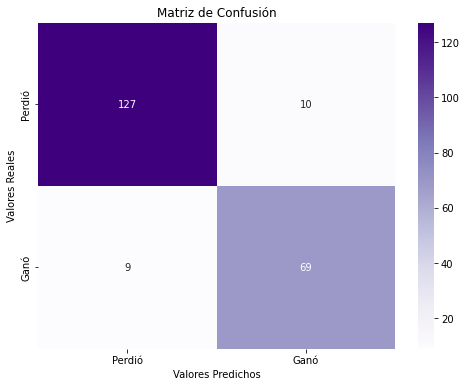

In [0]:
# Visualizar la matriz de confusión
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_true = predictions.select("Resultado").collect()
y_pred = predictions.select("prediction").collect()

conf_matrix = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples", xticklabels=['Perdió', 'Ganó'], yticklabels=['Perdió', 'Ganó'])
plt.xlabel('Valores Predichos')
plt.ylabel('Valores Reales')
plt.title('Matriz de Confusión')
plt.show()


### Vemos la exactitud (accuracy) del modelo junto con el AUC de la curva COR

In [0]:
# Evaluar el modelo en el conjunto de prueba
evaluator = MulticlassClassificationEvaluator(labelCol="Resultado", predictionCol="prediction", metricName="accuracy")
accuracy = evaluator.evaluate(predictions)

binary_evaluator = BinaryClassificationEvaluator(labelCol="Resultado", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
auc = binary_evaluator.evaluate(predictions)

print(f"Accuracy en el conjunto de prueba: {accuracy}")
print(f"Área bajo la curva ROC en el conjunto de prueba: {auc}")

Accuracy en el conjunto de prueba: 0.9116279069767442
Área bajo la curva ROC en el conjunto de prueba: 0.965281676960509



## CUADRO LATINO

In [0]:
import pandas as pd

# Definir nuevos parámetros para el cuadro latino
max_iter_values = [1, 2, 5]
reg_param_values = [0.001, 0.5, 1.0]

results = []

# Iterar sobre cada combinación de parámetros
for max_iter in max_iter_values:
    for reg_param in reg_param_values:
        # Crear el modelo de regresión logística con los parámetros actuales
        lr = LogisticRegression(labelCol="Resultado", featuresCol="features", maxIter=max_iter, regParam=reg_param)
        
        # Ajustar el modelo
        lr_model = lr.fit(train_data)
        
        # Obtener las predicciones con probabilidades
        predictions = lr_model.transform(test_data)
        
        # Evaluar el modelo en el conjunto de prueba
        evaluator = MulticlassClassificationEvaluator(labelCol="Resultado", predictionCol="prediction", metricName="accuracy")
        accuracy = evaluator.evaluate(predictions)
        
        binary_evaluator = BinaryClassificationEvaluator(labelCol="Resultado", rawPredictionCol="rawPrediction", metricName="areaUnderROC")
        auc = binary_evaluator.evaluate(predictions)
        
        # Guardar los resultados
        results.append((max_iter, reg_param, accuracy, auc))

# Crear un DataFrame con los resultados
results_df = pd.DataFrame(results, columns=["MaxIter", "RegParam", "Accuracy", "AUC"])

In [0]:
results_df.head(10)

,MaxIter,RegParam,Accuracy,AUC
0,1,0.001,0.781395,0.875912
1,1,0.500,0.753488,0.875912
2,1,1.000,0.725581,0.875912
3,2,0.001,0.865116,0.943758
4,2,0.500,0.767442,0.923451
5,2,1.000,0.744186,0.909695
6,5,0.001,0.920930,0.964814
7,5,0.500,0.767442,0.935055
8,5,1.000,0.739535,0.915965
